# Workbook for DOW#1

* Use this notebook to organize your analysis of the Philadelphia weather dataset
* Remember to document EVERYTHING with Markdown cells
* Set out the questions that you want to answer from the data

### Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the dataset

In [2]:
weather_df = pd.read_csv('data/philadelphia_weather_2005_to_2025.csv')
weather_df = weather_df.assign(date=pd.to_datetime(weather_df['date']))

#### Inspect the data

* We have looked at these data in a couple of previous notebooks
* Remind yourself of the columns
* Here the data goes from 2005 to 2025

In [3]:
weather_df.columns

Index(['day', 'year', 'high', 'low', 'rain', 'snow', 'date', 'day_num',
       'month_num', 'dow', 'dow_name', 'month'],
      dtype='str')

In [4]:
weather_df.head()

,day,year,high,low,rain,snow,date,day_num,month_num,dow,dow_name,month
0,January 1,2005,64,39,0.00,0.0,2005-01-01,1,1,5,Saturday,January
1,January 2,2005,47,33,0.01,0.0,2005-01-02,2,1,6,Sunday,January
2,January 3,2005,57,40,0.06,0.0,2005-01-03,3,1,0,Monday,January
3,January 4,2005,55,44,0.00,0.0,2005-01-04,4,1,1,Tuesday,January
4,January 5,2005,47,36,0.62,0.0,2005-01-05,5,1,2,Wednesday,January


In [5]:
weather_df['year'].value_counts()

year
2008    366
2012    366
2016    366
2020    366
2024    366
2005    365
2006    365
2007    365
2009    365
2010    365
2011    365
2013    365
2014    365
2015    365
2017    365
2018    365
2019    365
2021    365
2022    365
2023    365
2025    365
Name: count, dtype: int64

### What are your questions?

1. How did the low and high temperature on Christmas day change over time?
2. How did the yearly average temperature change from 2005-2025?
3. Which days of the week experienced the most rain?
4. How did annual total snowfall change over time?
5. How did the highest and lowest recorded temperatures for each year change over time?

#### Question 1: How did the low and high temperature on Christmas day change over time?

Text(0.5, 0, 'Year')

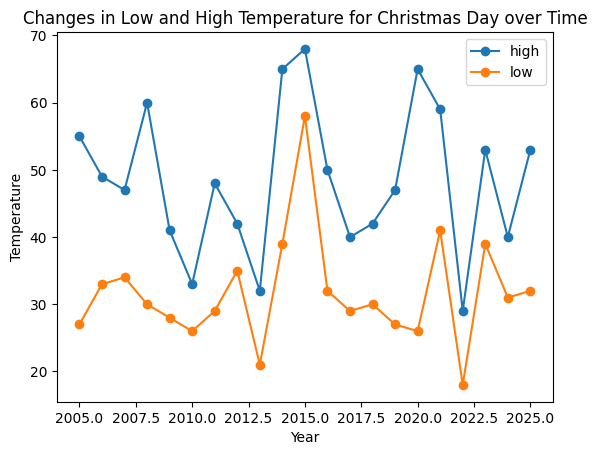

In [15]:
christmas_df = weather_df.query("day=='December 25'").set_index('year')[['high','low']]
christmas_df.plot(kind = 'line', style = '-o')
plt.title("Changes in Low and High Temperature for Christmas Day over Time")
plt.ylabel("Temperature")
plt.xlabel("Year")

From the plot above, we can see that the temperatures on Christmas day fluctuate fairly significantly year by year.

In [22]:
print(f"The hottest Christmas in the dataset was in {christmas_df['high'].idxmax()}, with a high temperature of {christmas_df['high'].max()} degrees Farenheit.")

The hottest Christmas in the dataset was in 2015, with a high temperature of 68 degrees Farenheit.


An additional interesting fact is that 2015 was the hottest Christmas in any year from 1874 to 2025, tied only with Christmas in 1964. (According to https://www.stormfax.com/phlChristmasWx.htm)

In [23]:
print(f"The coldest Christmas in the dataset was in {christmas_df['low'].idxmin()}, with a low temperature of {christmas_df['low'].min()} degrees Farenheit.")

The coldest Christmas in the dataset was in 2022, with a low temperature of 18 degrees Farenheit.


However, this is still 17 degrees Farenheit warmer than the coldest Christmas day, which was in 1980 and 1983, which had a minimum temperature of just 1 degree Farenheit. (https://www.stormfax.com/phlChristmasWx.htm)

In [24]:
print(f"The Christmas with the greatest temperature change was in {(christmas_df['high'] - christmas_df['low']).idxmax()}, with a temperature difference between high and low of {(christmas_df['high'] - christmas_df['low']).max()} degrees Farenheit.")

The Christmas with the greatest temperature change was in 2020, with a temperature difference between high and low of 39 degrees Farenheit.
